In [51]:
#1.パッケージのインポート
import os
import matplotlib.pyplot as plt # type: ignore
import pandas as pd # type: ignore
import numpy as np
from scipy import stats
from vistats import annotate_brackets

In [52]:
#2.ファイルのパスをコピペ（先頭にrつけないとエラー吐くかも
filepath=r"C:\Users\ryugo\CELLCOUNT\originfile.csv"

#3.ファイルの読み込み
df=pd.read_csv(filepath)
df.set_index('ID', inplace=True)
df.head()

,tdTomato,endfos,overlap,NeuN
ID,,,,
10-13L.tif,32,3,1,460
10-13R.tif,15,7,0,532
10-15L.tif,38,14,3,669
10-15R.tif,24,20,1,581
11-27L.tif,32,9,1,589


In [53]:
#各数値を計算して表に追加
df['tdTomato/NeuN'] = df['tdTomato'] / df['NeuN']
df['fos/NeuN'] = df['endfos'] / df['NeuN']
df['overlap/NeuN'] = df['overlap'] / df['NeuN']
df['chance_level'] = df['tdTomato/NeuN'] * df['fos/NeuN']
df['ov/NeuN_corrected'] = df['overlap/NeuN'] / df['chance_level']
order=['tdTomato','endfos','overlap','NeuN','tdTomato/NeuN','fos/NeuN','ov/NeuN_corrected','overlap/NeuN','chance_level']
df=df[order]
df

,tdTomato,endfos,overlap,NeuN,tdTomato/NeuN,fos/NeuN,ov/NeuN_corrected,overlap/NeuN,chance_level
ID,,,,,,,,,
10-13L.tif,32,3,1,460,0.069565,0.006522,4.791667,0.002174,0.000454
10-13R.tif,15,7,0,532,0.028195,0.013158,0.000000,0.000000,0.000371
10-15L.tif,38,14,3,669,0.056801,0.020927,3.772556,0.004484,0.001189
10-15R.tif,24,20,1,581,0.041308,0.034423,1.210417,0.001721,0.001422
11-27L.tif,32,9,1,589,0.054329,0.015280,2.045139,0.001698,0.000830
11-27R.tif,23,4,0,562,0.040925,0.007117,0.000000,0.000000,0.000291
11-33L.tif,21,6,0,459,0.045752,0.013072,0.000000,0.000000,0.000598
11-33R.tif,21,4,0,455,0.046154,0.008791,0.000000,0.000000,0.000406
12-1L.tif,39,22,3,636,0.061321,0.034591,2.223776,0.004717,0.002121


In [54]:
#個体ごとの平均を別の表(grouped_df)に保存
df.index = df.index.str.replace(r'^1-', '01', regex=True)
df.index = df.index.str.replace(r'^2-', '02', regex=True)
df.index = df.index.str.replace(r'^3-', '03', regex=True)
df.index = df.index.str.replace(r'^4-', '04', regex=True)
df.index = df.index.str.replace(r'^5-', '05', regex=True)
df.index = df.index.str.replace(r'^6-', '06', regex=True)
df.index = df.index.str.replace(r'^7-', '07', regex=True)
df.index = df.index.str.replace(r'^8-', '08', regex=True)
df.index = df.index.str.replace(r'^9-', '09', regex=True)
df['ID_prefix'] = df.index.str[:2]
grouped_df = df.groupby('ID_prefix').mean()
gp_order=['tdTomato/NeuN','fos/NeuN','ov/NeuN_corrected']
grouped_df=grouped_df[gp_order]
grouped_df

,tdTomato/NeuN,fos/NeuN,ov/NeuN_corrected
ID_prefix,,,
02,0.054796,0.051485,1.724743
03,0.048307,0.056407,1.215090
04,0.058961,0.047623,1.512697
05,0.041364,0.041917,0.898955
06,0.027293,0.047504,1.855679
07,0.028242,0.036352,1.608987
08,0.024509,0.035151,1.941109
09,0.031173,0.018626,0.703869
10,0.048967,0.018757,2.443660


In [55]:
# ID_prefixを整数に変換
grouped_df.index = grouped_df.index.astype(int)

# remort群とrecent群を定義（範囲指定）
remort = grouped_df[(grouped_df.index >= 2) & (grouped_df.index <= 8)]
recent = grouped_df[(grouped_df.index >= 9) & (grouped_df.index <= 15)]

# remort群とrecent群の平均を計算
remort_mean = remort.mean()
recent_mean = recent.mean()

# 平均値を新しいデータフレームに保存
mean_df = pd.DataFrame({'remort_mean': remort_mean, 'recent_mean': recent_mean})
mean_df

,remort_mean,recent_mean
tdTomato/NeuN,0.040496,0.045142
fos/NeuN,0.045206,0.019237
ov/NeuN_corrected,1.536751,0.820714


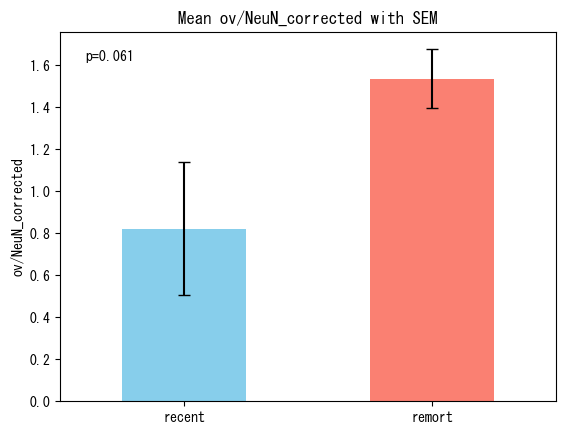

In [72]:
# remort群とrecent群のov/NeuN_correctedの平均を計算
remort_mean = remort['ov/NeuN_corrected'].mean()
recent_mean = recent['ov/NeuN_corrected'].mean()

t_stat, p_value = stats.ttest_ind(recent['ov/NeuN_corrected'], remort['ov/NeuN_corrected'])

# remort群とrecent群のov/NeuN_correctedのSEMを計算
remort_sem = stats.sem(remort['ov/NeuN_corrected'])
recent_sem = stats.sem(recent['ov/NeuN_corrected'])
mean_sem_df = pd.DataFrame({
    'mean': [recent_mean, remort_mean],
    'sem': [recent_sem, remort_sem]
}, index=['recent', 'remort'])
mean_sem_df
# データ型を数値に変換
mean_sem_df = mean_sem_df.astype(float)

# 棒グラフを作成
fig, ax = plt.subplots()
mean_sem_df['mean'].plot(kind='bar', yerr=mean_sem_df['sem'], ax=ax, capsize=4, color=['skyblue', 'salmon'])
ax.set_ylabel('ov/NeuN_corrected')
ax.set_title('Mean ov/NeuN_corrected with SEM')

# p値を左上に表示
plt.text(-0.4, recent_mean + 0.8, f'p={p_value:.3f}', fontsize=10)

plt.xticks(rotation=0)
plt.show()